In [ ]:
import os
from PIL import Image


def read_images_from_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.JPG', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            yield image, filename

def crop_and_save_images(input_folder, output_folder, crop_box):
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for image, filename in read_images_from_folder(input_folder):
        # print(f"Processing image: {filename}")
        # Crop the image
        cropped_image = image.crop(crop_box)
        # Construct the output path
        output_path = os.path.join(output_folder, filename)
        # Save the cropped image
        cropped_image.save(output_path)
        # print(f"Saved cropped image: {output_path}")

# Construct the relative path to the input folder
current_dir = os.getcwd()
input_folder = os.path.join(current_dir, 'Data', 'badpart_full')
output_folder = os.path.join(current_dir, 'Superviseddata', 'Bad')

# Define the crop box (left, upper, right, lower)
crop_box = (950+890, 1225-45, 1010+1190, 1760+85)  # Example crop box, adjust as needed
# Crop and save images
crop_and_save_images(input_folder, output_folder, crop_box)

In [2]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

In [3]:
DIRECTORY = r'Superviseddata'
CATEGORIES= ['/Good' , '/Bad']
IMG_SIZE=100
data=[]
x=[]
y=[]

for category in CATEGORIES:
    folder= DIRECTORY+category
    label= CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=folder+'/'+img
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(100,100))
        data.append([img_arr, label])

random.shuffle(data)
for features, labels in data:
    x.append(features)
    y.append(labels)
x=np.array(x)
y=np.array(y)
pickle.dump(x, open('x.pkl','wb'))
pickle.dump(y, open('y.pkl','wb'))

[0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1]


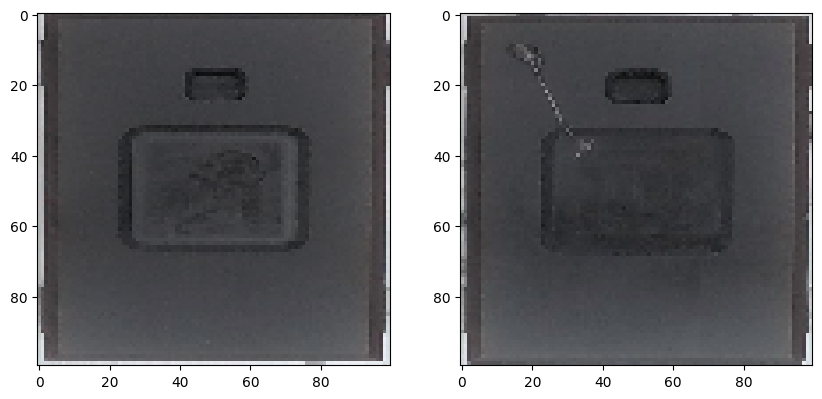

In [4]:
print(y)
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
ax[0].imshow(x[0])
ax[1].imshow(x[2])
# 0 is good and 1 is bad

In [5]:
import pickle
import time
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential


In [6]:
#scale data
x = x/255

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
#train and evaluate using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score 
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_knn=knn.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[3 1]
 [3 1]]
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.50      0.25      0.33         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8



d:\01_Project\001WVU\SEM I\Smart Manufacturing(593B)\Project2\sm_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\01_Project\001WVU\SEM I\Smart Manufacturing(593B)\Project2\sm_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [9]:
#train and evaluate using random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_rf=rf.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))


[[3 1]
 [1 3]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



In [10]:
#train and evaluate using SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_svm=svm.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))


[[0 4]
 [0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



d:\01_Project\001WVU\SEM I\Smart Manufacturing(593B)\Project2\sm_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\01_Project\001WVU\SEM I\Smart Manufacturing(593B)\Project2\sm_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\01_Project\001WVU\SEM I\Smart Manufacturing(593B)\Project2\sm_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [11]:
NAME=f'defect-vs-nodefect-prediction-{int(time.time())}'
tensorboard=TensorBoard(log_dir=f'logs\\{NAME}\\')

In [12]:
#train deep learning model
#Deep Learning
model= Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=x.shape[1:]))

model.add(MaxPooling2D((2,2)))
          
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='sigmoid')) #1 softmax
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(x_train,y_train, epochs=37, batch_size=5, callbacks=[tensorboard])
model.evaluate(x_test,y_test)

d:\01_Project\001WVU\SEM I\Smart Manufacturing(593B)\Project2\sm_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5972 - loss: 0.8385
Epoch 2/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3944 - loss: 0.7120
Epoch 3/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5261 - loss: 0.6933
Epoch 4/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5556 - loss: 0.6910
Epoch 5/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5522 - loss: 0.6991
Epoch 6/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5961 - loss: 0.6686
Epoch 7/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5437 - loss: 0.6911
Epoch 8/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6342 - loss: 0.6486
Epoch 9/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6022 - loss: 0.6475
Epoch 10/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4808 - loss: 0.6692
Epoch 11/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5142 - loss: 0.6131
Epoch 12/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5627 - loss: 0.6704
E

[1.5756330490112305, 0.375]

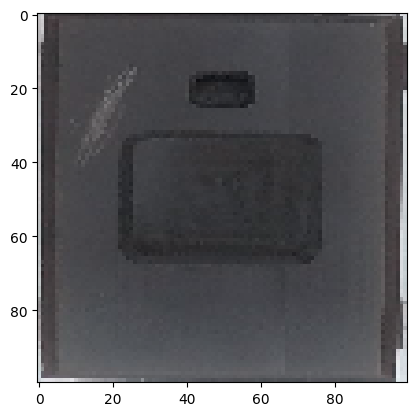

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.11178965]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: defective


C:\Users\panth\AppData\Local\Temp\ipykernel_22420\2619807415.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_DL.append(int(y_pred_DL))


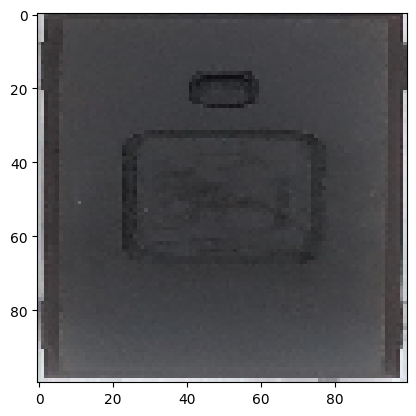

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.2759376]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


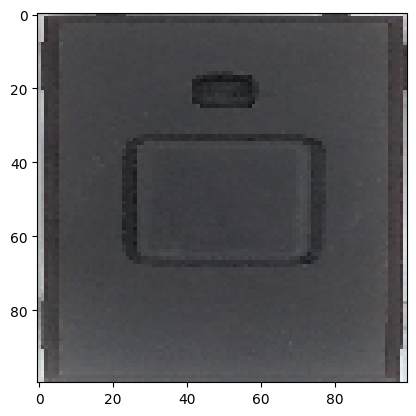

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.9823848]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: not defective


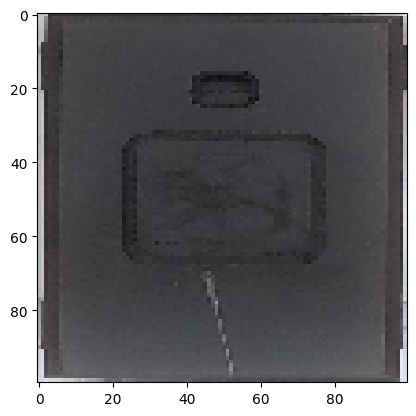

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.41110313]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: defective


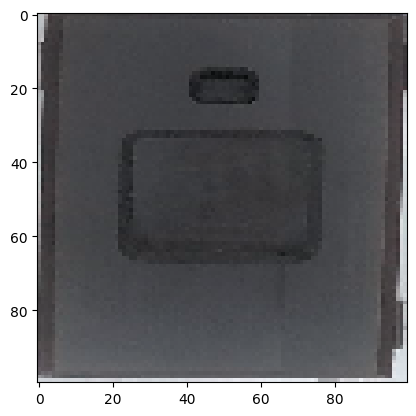

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.18744862]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


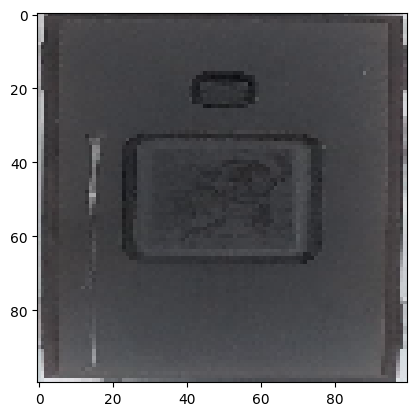

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.06135019]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: defective


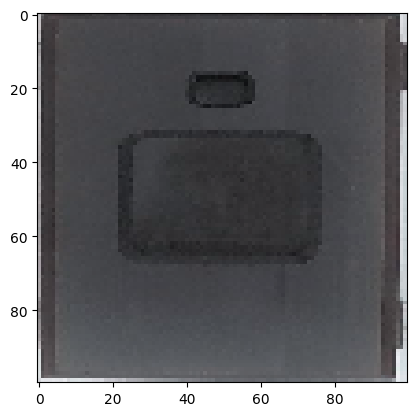

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.229754]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


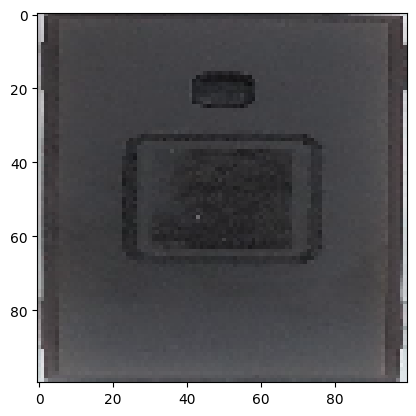

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.14906621]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: defective
[[3 1]
 [4 0]]


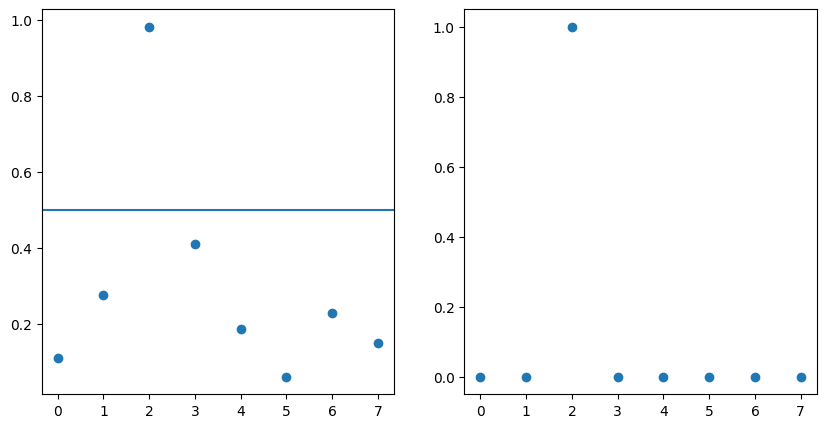

In [13]:

#make predictions
i=0
data_DL=[]
data_DL_O =[]
while i<len(y_test):
    plt.imshow(x_test[i])
    plt.show()

    y_pred_DL_O=model.predict(x_test[i,:].reshape(1, 100, 100, 3))
    print(y_pred_DL_O)
    y_pred_DL=y_pred_DL_O>0.5


    if(y_pred_DL==False):
        pred='not_defective'
    else:
        pred='defective'
    print(f"The prediction was: {pred}")
    print(f"The actual label was: {y_pred_DL}")
    if(y_test[i]==0): #good == 0  
        print(f"The actual label is: not defective")
    else: #bad == 1 
        print(f"The actual label is: defective")

    data_DL.append(int(y_pred_DL))
    data_DL_O.append(y_pred_DL_O)
    
    i=i+1
y_DL=[]
for n in range(len(y_test)):
    y_DL.append(n)

#plotting    
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
ax[1].scatter(y_DL,data_DL)
# ax[1].axhline(y=0.02)

ax[0].scatter(y_DL,data_DL_O)
ax[0].axhline(y=0.5)

##

#confusion matrix
cm = confusion_matrix(y_test, (data_DL))
print(cm)

In [14]:
#evaluate all models by using confusion matrix
def model_evaluation(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    TN = cm[0][0]
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)
    Negative_Predictive_Value = TN / (TN + FN)
    
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"Negative Predictive Value: {Negative_Predictive_Value}")

In [15]:
# Evaluate KNN
model_evaluation(y_test, y_pred_knn)

Accuracy: 0.5
Sensitivity: 0.25
Specificity: 0.75
Precision: 0.5
Negative Predictive Value: 0.5


In [16]:
#evaluate random forest
model_evaluation(y_test, y_pred_rf)

Accuracy: 0.75
Sensitivity: 0.75
Specificity: 0.75
Precision: 0.75
Negative Predictive Value: 0.75


In [17]:
#evualate SVM
model_evaluation(y_test, y_pred_svm)

Accuracy: 0.5
Sensitivity: 1.0
Specificity: 0.0
Precision: 0.5
Negative Predictive Value: nan


C:\Users\panth\AppData\Local\Temp\ipykernel_22420\1995448054.py:12: RuntimeWarning: invalid value encountered in scalar divide
  Negative_Predictive_Value = TN / (TN + FN)


In [18]:
#evaluate deep learning
model_evaluation(y_test, data_DL)

Accuracy: 0.375
Sensitivity: 0.0
Specificity: 0.75
Precision: 0.0
Negative Predictive Value: 0.42857142857142855


## Now Using data augmentation


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(
    # rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,               ## flip is not good for this dataset. Zoom is good
    # shear_range=0.1,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # vertical_flip=True,
    # brightness_range=[0.4,1.9],
    # featurewise_center=True,    # Set input mean to 0
    featurewise_std_normalization=True,  #
    preprocessing_function=lambda x: x + np.random.normal(0, 0.09, x.shape),
    # channel_shift_range=50.0,
    fill_mode='nearest'
)



DIRECTORY = r'Superviseddata'
CATEGORIES= ['/Good' , '/Bad']
IMG_SIZE=100
data=[]
x=[]
y=[]
img_arr=[]
augmented_images=[]
folder=''
label=0

for category in CATEGORIES:
    folder= DIRECTORY+category
    label= CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=folder+'/'+img
        img_arr=cv2.imread(img_path)
        augmented_images = [datagen.random_transform(img_arr) for _ in range(3)]
        for aug_img in augmented_images:
            aug_img_resized = cv2.resize(aug_img, (IMG_SIZE, IMG_SIZE))
            data.append([aug_img_resized, label])


random.shuffle(data)
for features, labels in data:
    x.append(features)
    y.append(labels)
x=np.array(x)
y=np.array(y)
pickle.dump(x, open('x.pkl','wb'))
pickle.dump(y, open('y.pkl','wb'))

d:\01_Project\001WVU\SEM I\Smart Manufacturing(593B)\Project2\sm_env\lib\site-packages\keras\src\legacy\preprocessing\image.py:1063: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [20]:
print(y)


[1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1]


In [21]:
x = x/255.0

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
#train and evaluate using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score 
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_knn_A=knn.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_knn_A))
print(classification_report(y_test,y_pred_knn_A))

[[ 8  2]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.85      0.85      0.85        13

    accuracy                           0.83        23
   macro avg       0.82      0.82      0.82        23
weighted avg       0.83      0.83      0.83        23



In [24]:
#train and evaluate using random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_rf_A=rf.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_rf_A))
print(classification_report(y_test,y_pred_rf_A))

[[10  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [25]:
#train and evaluate using SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_svm_A=svm.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_svm_A))
print(classification_report(y_test,y_pred_svm_A))

[[ 4  6]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.67      0.92      0.77        13

    accuracy                           0.70        23
   macro avg       0.73      0.66      0.65        23
weighted avg       0.72      0.70      0.67        23



In [26]:
NAME=f'defect-vs-nodefect-prediction-{int(time.time())}'
tensorboard=TensorBoard(log_dir=f'logs\\{NAME}\\')

In [27]:
#train deep learning model
#Deep Learning
model_augmented= Sequential()
model_augmented.add(Conv2D(64,(3,3), activation='relu', input_shape=x.shape[1:]))
model_augmented.add(MaxPooling2D((2,2)))
          
model_augmented.add(Conv2D(64,(3,3), activation='relu'))
model_augmented.add(MaxPooling2D((2,2)))

model_augmented.add(Flatten())
model_augmented.add(Dense(128, activation='relu'))
model_augmented.add(Dense(1,activation='sigmoid')) #1 softmax
model_augmented.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model_augmented.summary()

d:\01_Project\001WVU\SEM I\Smart Manufacturing(593B)\Project2\sm_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model_augmented.fit(x_train,y_train, epochs=37, batch_size=5, callbacks=[tensorboard])
model_augmented.evaluate(x_test,y_test)

Epoch 1/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5487 - loss: 0.7534
Epoch 2/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4844 - loss: 0.6957
Epoch 3/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5162 - loss: 0.6964
Epoch 4/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5407 - loss: 0.6951
Epoch 5/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5899 - loss: 0.6758
Epoch 6/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4499 - loss: 0.6784
Epoch 7/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6025 - loss: 0.6351
Epoch 8/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6885 - loss: 0.5719
Epoch 9/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6816 - loss: 0.5760
Epoch 10/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6349 - loss: 0.5967
Epoch 11/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6345 - loss: 0.6246
Epoch 12/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy:

[0.00766731658950448, 1.0]

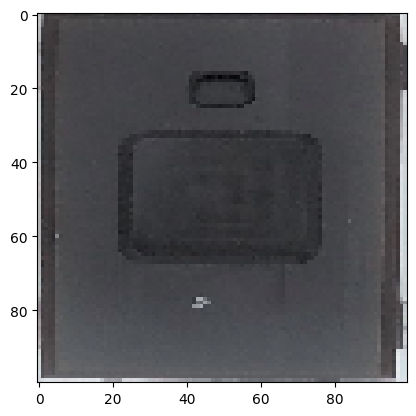

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.9999341]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


C:\Users\panth\AppData\Local\Temp\ipykernel_22420\2885487214.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_DL_A.append(int(y_pred_DL))


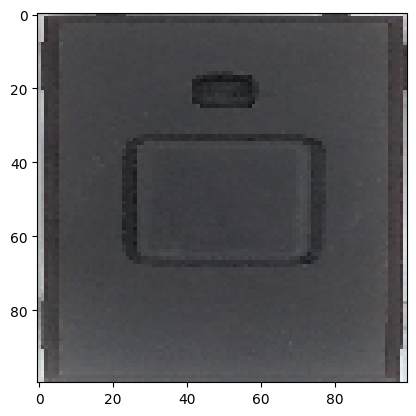

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.01061413]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


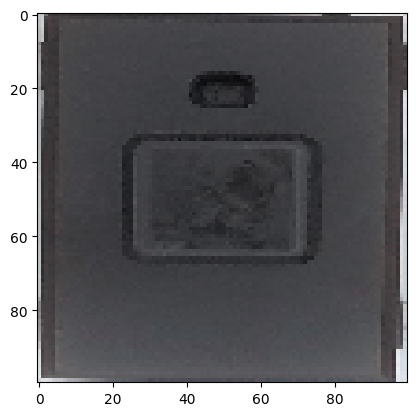

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.00278376]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


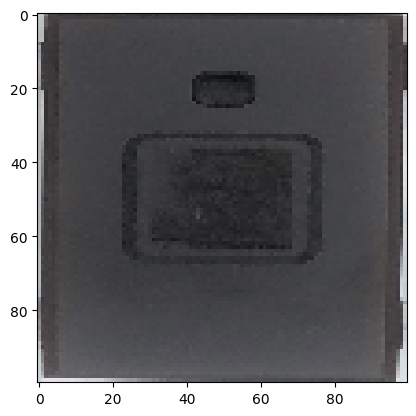

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.05025744]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


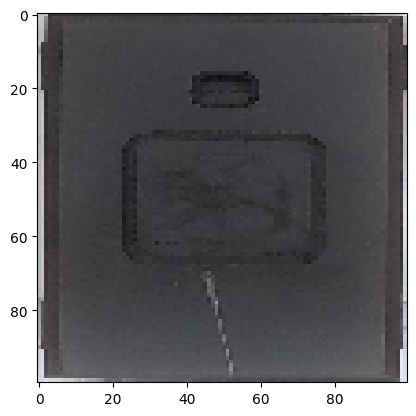

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.999576]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


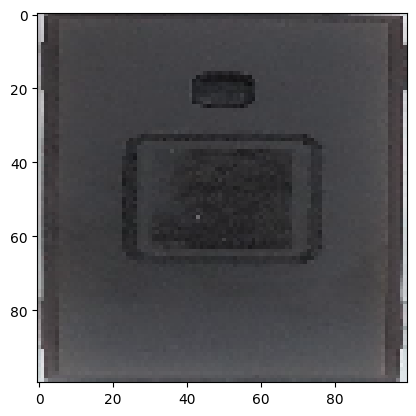

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.945858]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


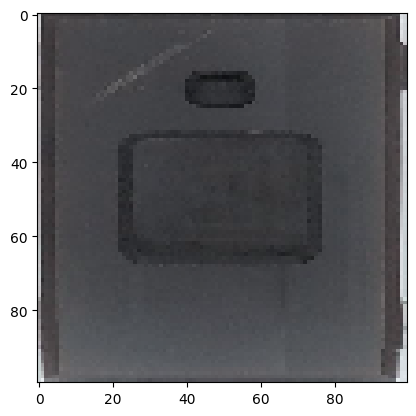

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.9810856]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


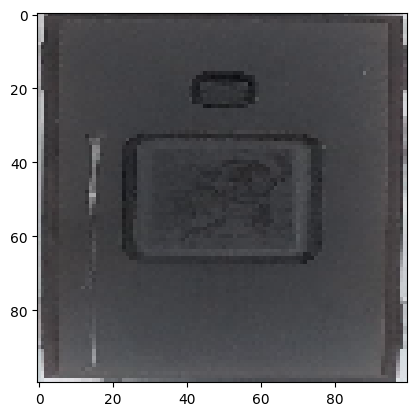

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.99981356]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


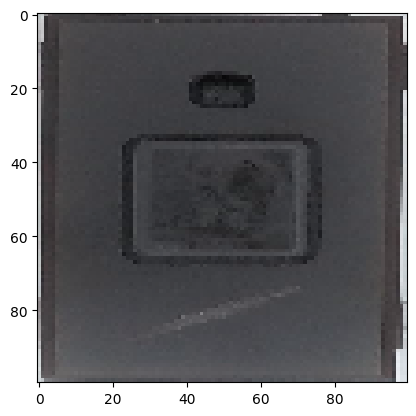

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.9956764]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


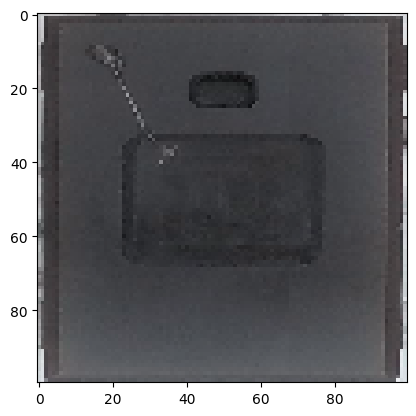

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.99999994]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


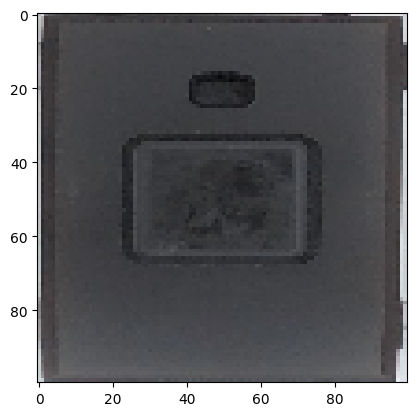

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.00740496]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


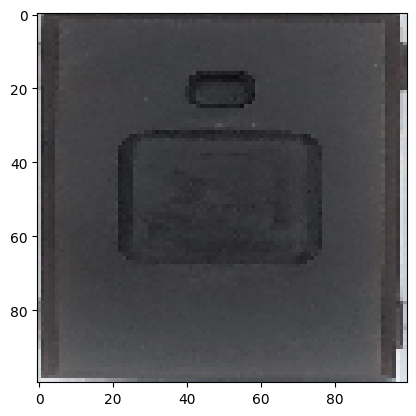

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.00186725]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


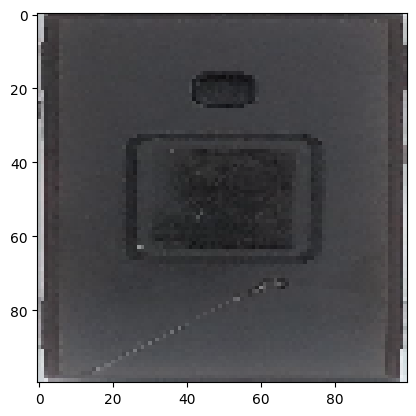

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.998391]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


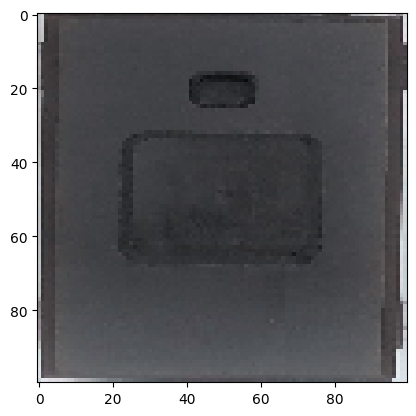

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.00045323]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


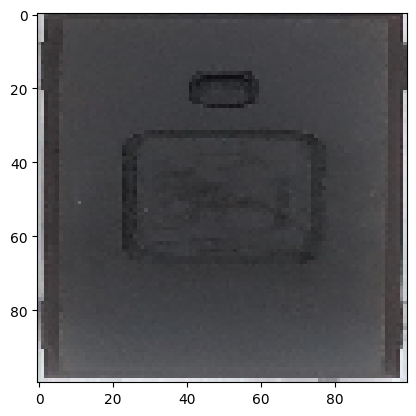

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.00201494]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


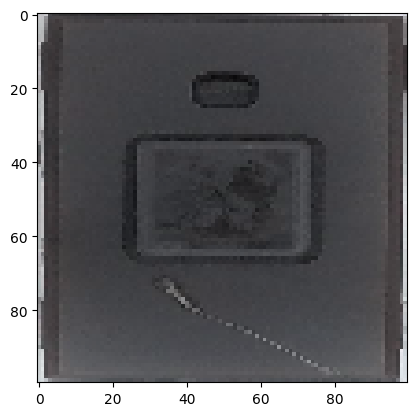

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[1.]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


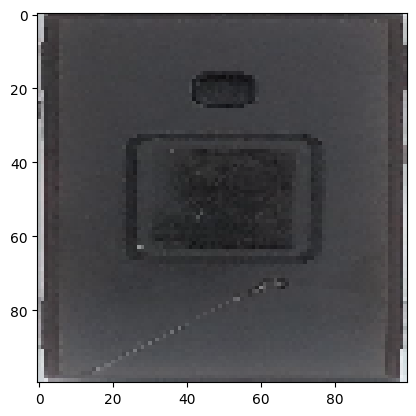

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.998391]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


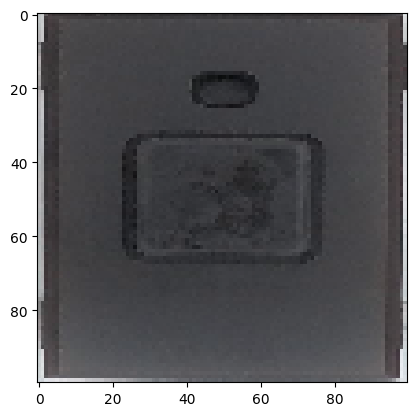

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.00694642]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


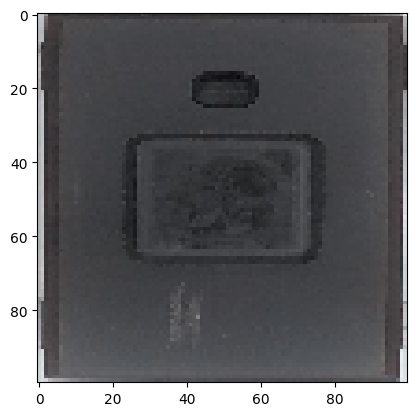

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.99834114]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


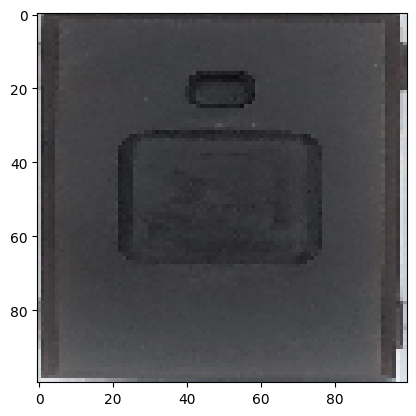

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.00186725]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


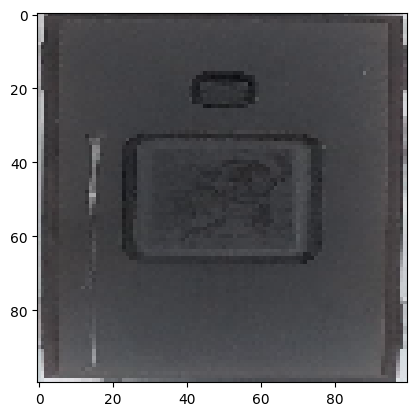

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.99981356]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


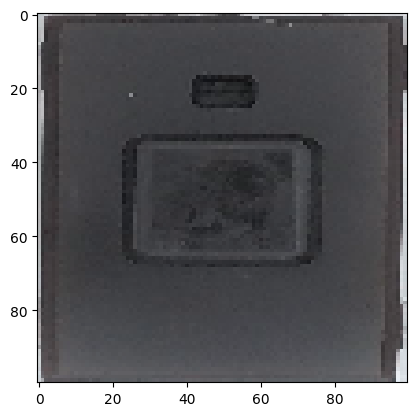

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.99661314]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


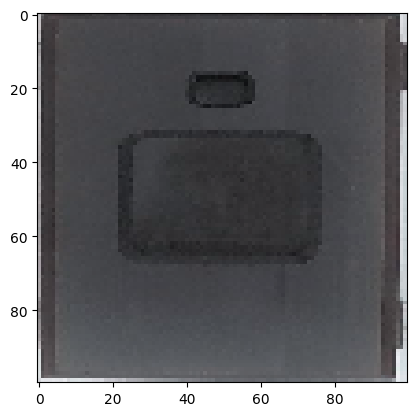

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.00248303]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective
[[10  0]
 [ 0 13]]


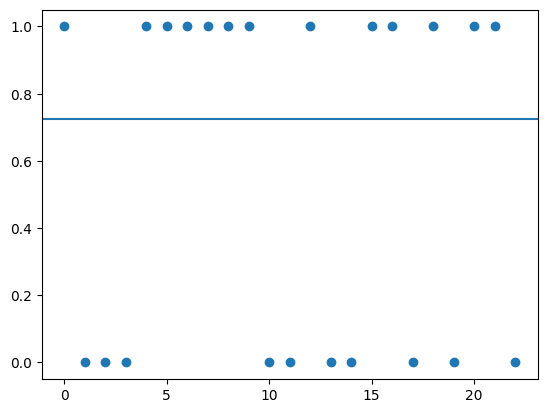

In [29]:
#make predictions
i=0
data_DL_A=[]
while i<len(y_test):
    plt.imshow(x_test[i])
    plt.show()

    y_pred_DL=model_augmented.predict(x_test[i,:].reshape(1, 100, 100, 3))
    print(y_pred_DL)
    y_pred_DL=y_pred_DL>0.725

    y_pred_DL= (y_pred_DL)

    if(y_pred_DL== False):
        pred='not_defective'
    else:
        pred='defective'
    print(f"The prediction was: {pred}")
    print(f"The actual label was: {y_pred_DL}")
    if(y_test[i]==0): #good == 0  
        print(f"The actual label is: not defective")
    else: #bad == 1 
        print(f"The actual label is: defective")
    data_DL_A.append(int(y_pred_DL))
    
    i=i+1
y_DL_A=[]
for n in range(len(y_test)):
    y_DL_A.append(n)
plt.scatter(y_DL_A,data_DL_A)
plt.axhline(y=0.725)

plt.show


#confusion matrix
cm = confusion_matrix(y_test, (data_DL_A))
print(cm)

In [30]:
# Evaluate KNN
model_evaluation(y_test, y_pred_knn_A)

Accuracy: 0.8260869565217391
Sensitivity: 0.8461538461538461
Specificity: 0.8
Precision: 0.8461538461538461
Negative Predictive Value: 0.8


In [31]:
#evaluate random forest
model_evaluation(y_test, y_pred_rf_A)

Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Negative Predictive Value: 1.0


In [32]:
#evualate SVM
model_evaluation(y_test, y_pred_svm_A)

Accuracy: 0.6956521739130435
Sensitivity: 0.9230769230769231
Specificity: 0.4
Precision: 0.6666666666666666
Negative Predictive Value: 0.8


In [33]:
#evaluate deep learning
model_evaluation(y_test, data_DL_A)

Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Negative Predictive Value: 1.0
